<a href="https://colab.research.google.com/github/551997/Segmentasi-Pelanggan-Costumer-pada-Analisis-Pemasaran/blob/main/Costumer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u> **Customer Segmentation on Marketing Analytics using RFM Analysis.** <u> 

Ini adalah kumpulan data pemasaran yang berisi data pelanggan milik perusahaan ABC. Kumpulan data ini memiliki 2240 baris dan 28 kolom. Karena ini adalah kumpulan data pemasaran, kita dapat mengkategorikan variabel dalam hal 4 Prioryty of Marketing: produk, orang (people), tempat (places), dan promosi (diskon & kampanye).
Variabel dalam Dataset ini, sebagai berikut:

### *People:*
- *ID: Nomor ID Pelanggan*
- *Year_Birth: Tahun Lahir Pelanggan*
- *Education: Pendidikan Pelanggan*
- *Marital_Status: Status Pernikahan Pelanggan*
- *Income: Penghasilan Tahunan Pelanggan*
- *Kidhome: Jumlah Anak Pelanggan*
- *Teenhome: Jumlah Remaja di Rumah Pelanggan*
- *Dt_Customer: Tanggal Pelanggan Membeli atau Transaksi*
- *Recency: Jumlah Selisih Hari Pelanggan Sejak Transaksi Terakhir*
- *Complain: 1 jika Pelanggan melakukan pengajuan komplain, 0 lainnya*
- *Country: Lokasi Pelanggan*

### *Products:*
- *MntWines: Jumlah yang dihabiskan untuk wine dalam 2 tahun terakhir*
- *MntFruits: Jumlah yang dihabiskan untuk buah-buahan dalam 2 tahun terakhir*
- *MntMeatProducts: Jumlah yang dihabiskan untuk produk daging dalam 2 tahun terakhir*
- *MntFishProducts: Jumlah yang dihabiskan untuk produk ikan dalam 2 tahun terakhir*
- *MntSweetProducts: Jumlah yang dihabiskan untuk produk manis dalam 2 tahun terakhir*
- *MntGoldProds: Jumlah yang dihabiskan untuk produk emas dalam 2 tahun terakhir*

### *Promotions:*
- *NumDealsPurchases: umlah pembelian yang dilakukan dengan diskon*
- *AcceptedCmp3: 1 jika pelanggan menerima penawaran di kampanye ke-3, 0 sebaliknya*
- *AcceptedCmp4: 1 jika pelanggan menerima penawaran di kampanye ke-4, 0 sebaliknya*
- *AcceptedCmp5: 1 jika pelanggan menerima penawaran di kampanye ke-5, 0 sebaliknya*
- *AcceptedCmp1: 1 jika pelanggan menerima penawaran di kampanye pertama, 0 sebaliknya*
- *AcceptedCmp2: 1 jika pelanggan menerima penawaran di kampanye ke-2, 0 sebaliknya*
- *Response: 1 jika pelanggan menerima penawaran di kampanye terakhir, 0 jika tidak*

### *Places:*
- *NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan*
- *NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog*
- *NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko*
- *NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir*

### <u> <font color = black> *Steps Involved In The Process.* <u> </font>
- ***Menentukan Rumusan Masalah***
- ***Gambaran Besar pada Dataset***
- ***Pembersihan dan Analisis Data***
- ***Model*** 
- ***Interpretasi dan Kesimpulan***

## <font color = black>1). <u>Menentukan Rumusan Masalah:<u></font>
    
### *Menargetkan Pelanggan bernilai/memiliki integritas Tinggi ke perusahaan berdasarkan atribut Pelanggan agar implementasi strategi pemasaran dapat efektif dan juga alokasi sumber daya yang optimal.*

## <font color = black>2).<u>Gambaran Pada Dataset.<u></font>

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import datetime as dt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
from scipy.stats import probplot
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#import dataset
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('marketing_data.csv')
data.head() 

Saving marketing_data.csv to marketing_data (1).csv


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


###  -> Melihat ukuran dan struktur dataset:

In [6]:
data.shape

(2240, 28)

*Terdapat 2240 baris and 28 kolom pada dataset ini.*

In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

*Di sini Variabel pendapatan adalah tipe data **string**, yang harus diubah menjadi tipe **Integer**.*

In [8]:
data.rename(columns = {' Income ':'Income','Response':'AcceptedCmp6'}, inplace = True)

### -> Memeriksa Missing Value pada dataset ini:

In [9]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp6            0
Complain                0
Country                 0
dtype: int64

### -> Menentukan rangkuman matematis pada variabel angka (integer) :

In [10]:
data.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*Tabel di atas memberi kita pemahaman tentang struktur kumpulan data. Hal ini memungkinkan aku untuk menyederhanakan data dan juga membantu dalam memahami bentuk dan maksud dari data dengan memberikan angka yang sering diulang, bagian tengah dari semua angka , variasi antar variabel, dll. Ini membantu dalam mengetahui apakah data konsisten atau tidak konsisten untuk analisis lebih lanjut.*

## <font color = black>3).<u>*Data Cleaning* dan Analisis.<u></font>

## -> *Data Cleaning* :

### i). Konversi bentuk tipe data dari variabel Pendapatan (Income):

In [11]:
data['Income'].head()

0    $84,835.00 
1    $57,091.00 
2    $67,267.00 
3    $32,474.00 
4    $21,474.00 
Name: Income, dtype: object

*Di sini, variabel 'INCOME' adalah tipe data string dan juga memiliki simbol '$' atau dollar, yang harus dihapus.* 

In [12]:
warnings.filterwarnings("ignore")

data['Income'] = data['Income'].str.replace("$","").str.replace(",","")
data['Income'] = data['Income'].astype(float)

###  ii)  Menggabungkan value baris dari 2 Variabel, yaitu: Marital Status (status pernikahan) dan Education (pendidikan)

In [13]:
# Menggabungkan value baris dari variabel 'Marital Status' (status pernikahan)
data['Marital_Status'] = data['Marital_Status'].replace(["Alone","YOLO","Absurd"],"Single")
print(data['Marital_Status'].unique())

['Divorced' 'Single' 'Married' 'Together' 'Widow']


In [14]:
# Menggabungkan value baris dari variabel 'Education' (pendidikan):
data['Education'] = data['Education'].replace(["2n Cycle","Master"],"Masters")
print(data['Education'].unique())

['Graduation' 'PhD' 'Masters' 'Basic']


### iii) Konversi variabel 'datetime':

In [15]:
data['Dt_Customer'].head()

0    6/16/14
1    6/15/14
2    5/13/14
3    5/11/14
4     4/8/14
Name: Dt_Customer, dtype: object

In [16]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format='%m/%d/%y')
data['Dt_Customer'].head()

0   2014-06-16
1   2014-06-15
2   2014-05-13
3   2014-05-11
4   2014-04-08
Name: Dt_Customer, dtype: datetime64[ns]

### iv). Penambahan variabel baru:

In [17]:
data['Expenditure'] = data['MntWines'] + data['MntSweetProducts'] + data['MntMeatProducts']+ data['MntGoldProds'] + data['MntFruits'] + data['MntFishProducts'] 

In [18]:
data['Age'] = 2021 - data['Year_Birth']

In [19]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp6', 'Complain', 'Country', 'Expenditure',
       'Age'],
      dtype='object')

## -> Analisis Data :

In [21]:
cat_count = 0
num_count = 0
for i in data.dtypes:
    if i == 'object':
        cat_count = cat_count + 1
    else:
        num_count = num_count + 1

print("Jumlah Variabel Numerik :",num_count)
print("Jumlah Variabel Kategorik:",cat_count)

Jumlah Variabel Numerik : 27
Jumlah Variabel Kategorik: 3


###  i). Imputasi Missing values:

In [22]:
data_group = data.groupby(['Marital_Status','Education']).aggregate({'Income':'median'})
data_group

Income
Marital_Status Education          
Divorced       Basic        9548.0
               Graduation  55635.0
               Masters     49297.0
               PhD         50613.5
Married        Basic       22352.0
               Graduation  50737.0
               Masters     50017.0
               PhD         57081.5
Single         Basic       16383.0
               Graduation  49973.5
               Masters     49514.0
               PhD         48918.0
Together       Basic       23179.0
               Graduation  53977.0
               Masters     47586.5
               PhD         56756.0
Widow          Basic       22123.0
               Graduation  58275.0
               Masters     51459.5
               PhD         57032.0

In [23]:
df = data

df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Basic") & (df['Marital_Status'] == 'Divorced'), 9548.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Graduation") & (df['Marital_Status'] == 'Divorced'),55635.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Masters") & (df['Marital_Status'] == 'Divorced'), 49297.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "PhD") & (df['Marital_Status'] == 'Divorced'), 50613.5, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Basic") & (df['Marital_Status'] == 'Married'), 22352.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Graduation") & (df['Marital_Status'] == 'Married'), 50737.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Masters") & (df['Marital_Status'] == 'Married'), 50017.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "PhD") & (df['Marital_Status'] == 'Married'), 57081.5, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Basic") & (df['Marital_Status'] == 'Single'), 16383.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Graduation") & (df['Marital_Status'] == 'Single'), 49973.5, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Masters") & (df['Marital_Status'] == 'Single'), 49514.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "PhD") & (df['Marital_Status'] == 'Single'), 48918.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Basic") & (df['Marital_Status'] == 'Together'), 23179.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Graduation") & (df['Marital_Status'] == 'Together'), 53977.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Masters") & (df['Marital_Status'] == 'Together'), 47586.5, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "PhD") & (df['Marital_Status'] == 'Together'), 56756.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Basic") & (df['Marital_Status'] == 'Widow'), 22123.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Graduation") & (df['Marital_Status'] == 'Widow'), 58275.0, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "Masters") & (df['Marital_Status'] == 'Widow'), 51459.5, df['Income'])
df['Income'] = np.where((df['Income'].isnull() == True) &(df["Education"] == "PhD") & (df['Marital_Status'] == 'Widow'), 57032.0, df['Income'])

data = df

In [24]:
data['Income'].isnull().sum()

0

### ii). Menentukan distribusi variabel kontinu (angka tak hingga):

In [25]:
data_continous = data[['Income','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Age', 'Expenditure']]
data_continous.head()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Expenditure
0,84835.0,189,104,379,111,189,218,51,1190
1,57091.0,464,5,64,7,0,37,60,577
2,67267.0,134,11,59,15,2,30,63,251
3,32474.0,10,0,1,0,0,0,54,11
4,21474.0,6,16,24,11,0,34,32,91


<Figure size 720x360 with 0 Axes>

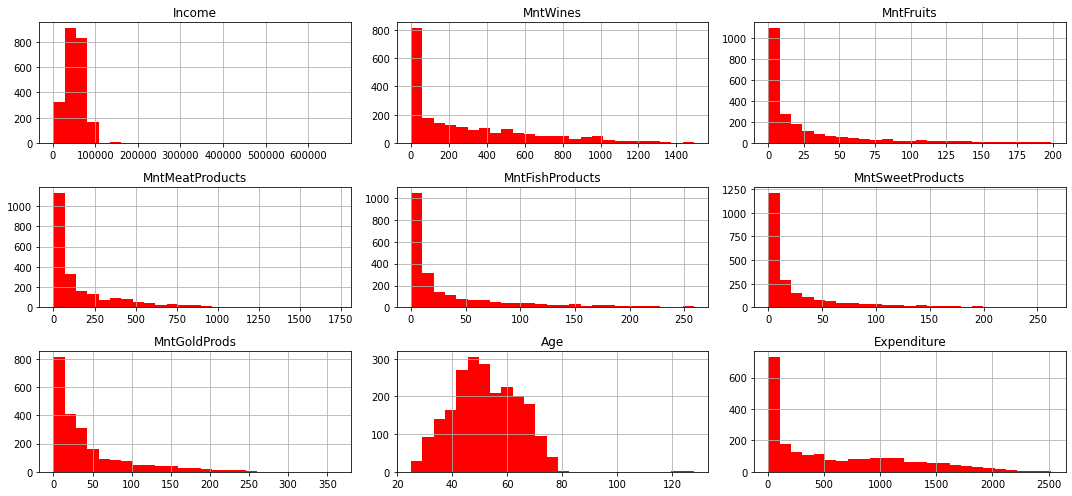

In [27]:
plt.figure(figsize = (10,5))
data_continous.hist(figsize = (15,7), color = "red", bins = 25)
plt.tight_layout()

### iii). Detecting the Outliers in Continous Variables:

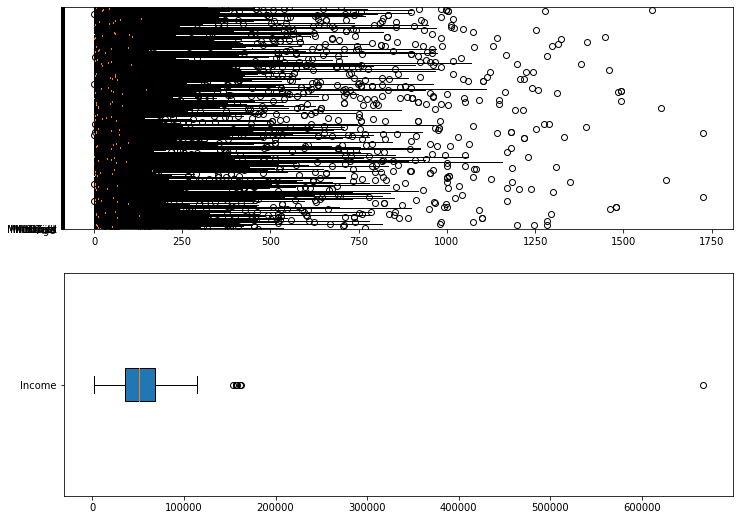

In [28]:
df1 = df[["Age","MntWines","MntFruits","MntMeatProducts","MntSweetProducts","MntFishProducts","MntGoldProds"]]
df2 = df["Income"]
df3 = df["Expenditure"]
fig = plt.figure(figsize =(12, 9))
ax = fig.add_subplot(211)

# membuat boxplot
bp = ax.boxplot(df1, patch_artist = True, vert = 0)

# mengatur nama sumbu pada boxplot
ax.set_yticklabels(["Age",'MntWines','MntFruits','MntMeat',
                     'MntSweet','MntFish','MntGold'])
ax = fig.add_subplot(212)

# membuat boxplot
bp = ax.boxplot(df2, patch_artist = True, vert = 0)

# mengatur nama sumbu pada boxplot
ax.set_yticklabels(["Income"])

plt.show()

## <font color = black>4). <u>Pembuatan Model Berdasarkan Analisis RFM: <u></font>

*Analisis RFM adalah teknik segmentasi perilaku pelanggan. Berdasarkan riwayat transaksi nasabah, analisis RFM berfokus pada 3 aspek utama transaksi nasabah:*
- *Recency(R)  : Berapa lama transaksi dari hari analisis pelanggan melakukan pembelian mereka.*
- *Frequency(F): Seberapa sering pelanggan melakukan pembelian.*
- *Monetary(M) : Berapa banyak uang yang telah dibayarkan pelanggan untuk pembelian mereka.*

### -> Menentukan nilai RFM:

Tahap ini, saya memiliki variabel seperti 'Recency', 'NumWebVisitsMonth', dan 'Expenditure' yang menentukan RFM untuk kumpulan data kami.

In [29]:
# Menghitung frekuensi:
data['Frequency'] = data['NumStorePurchases'] + data['NumCatalogPurchases'] + data['NumWebPurchases']

# Mengganti nama variabel 'recency' ,'Expenditure to Monetory', 'Recent_purchase'.
data.rename(columns = {'Expenditure':'Monetory','Recency':'Recent_Purchase'}, inplace = True)

In [30]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recent_Purchase', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp6', 'Complain', 'Country', 'Monetory',
       'Age', 'Frequency'],
      dtype='object')

### -> Memilih negara yang tepat untuk dilakukan analisis:

***Setelah mengatur RFM, lalu melihat jumlah pelanggan di masing-masing dari tujuh negara yang diberikan dalam kumpulan dataset ini.
Kemudian akan memilih negara dengan pelanggan tertinggi untuk dilakukan analisis karena pendapatan maksimum untuk perusahaan ditentukan oleh negara itu.***

In [31]:
data['Country'].value_counts()

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

### -> Membuat dataframe tersendiri untuk negara Spanyol:

In [34]:
df_spain = data[(data['Country'] == 'SP')].reset_index(drop = True)
df_spain = pd.DataFrame(df_spain[['ID','Recent_Purchase','Frequency','Monetory']])
df_spain.head()

,ID,Recent_Purchase,Frequency,Monetory
0,1826,0,14,1190
1,5371,0,6,91
2,7348,0,16,1192
3,1991,0,6,96
4,5642,0,10,222


In [35]:
df_spain.describe()

,ID,Recent_Purchase,Frequency,Monetory
count,1095.000000,1095.000000,1095.000000,1095.000000
mean,5558.421005,49.707763,12.404566,604.767123
std,3260.098770,29.103712,7.238164,613.021937
min,17.000000,0.000000,0.000000,6.000000
25%,2802.000000,24.500000,6.000000,67.500000
50%,5371.000000,51.000000,12.000000,367.000000
75%,8423.500000,74.000000,19.000000,1045.000000
max,11191.000000,99.000000,32.000000,2525.000000


####  *Tergantung pada persyaratan granularity perusahaan, setiap pelanggan dinilai pada atribut RFM pada skala 1-3, 3 menjadi yang tertinggi.* 

In [36]:
quantiles_recency = df_spain.quantile(q = [0.25,0.50,0.75])
quantiles_recency

,ID,Recent_Purchase,Frequency,Monetory
0.25,2802.0,24.5,6.0,67.5
0.50,5371.0,51.0,12.0,367.0
0.75,8423.5,74.0,19.0,1045.0


In [37]:
quantiles_recency = df_spain.quantile(q = [0.25,0.50,0.75])


# Membuat fungsi untuk menentukan nilai RFM:
def R_score(data):
    if data < quantiles_recency['Recent_Purchase'][0.25]:
        return 3
    elif data < quantiles_recency['Recent_Purchase'][0.75]:
        return 2
    else:
        return 1
    
def F_score(data):
    if data < quantiles_recency['Frequency'][0.25]:
        return 3
    elif data < quantiles_recency['Frequency'][0.75]:
        return 2
    else:
        return 1    
    
    
def M_score(data):
    if data < quantiles_recency['Monetory'][0.25]:
        return 3
    elif data < quantiles_recency['Monetory'][0.75]:
        return 2
    else:
        return 1     

In [38]:
df_spain['R_score'] = df_spain.Recent_Purchase.apply(lambda x : R_score(x))
df_spain['F_score'] = df_spain.Frequency.apply(lambda x : F_score(x))
df_spain['M_score'] = df_spain.Monetory.apply(lambda x : M_score(x))
df_spain['rfm_score'] = df_spain['R_score'].map(str) + df_spain['F_score'].map(str) + df_spain['M_score'].map(str) 

In [39]:
df_spain.head()

,ID,Recent_Purchase,Frequency,Monetory,R_score,F_score,M_score,rfm_score
0,1826,0,14,1190,3,2,1,321
1,5371,0,6,91,3,2,2,322
2,7348,0,16,1192,3,2,1,321
3,1991,0,6,96,3,2,2,322
4,5642,0,10,222,3,2,2,322


### -> Menentukan distribusi Variabel:

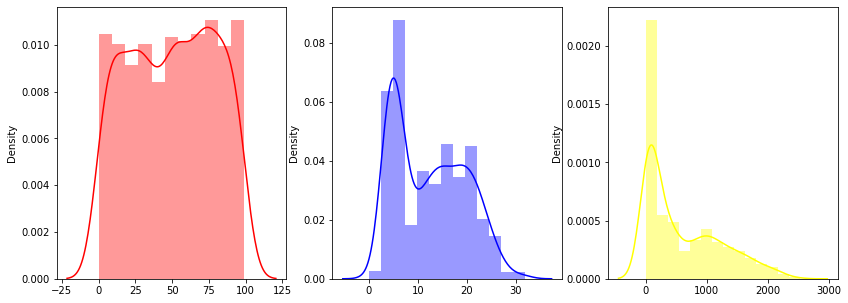

In [41]:
plt.figure(figsize = (14,5))

plt.subplot(1,3, 1)
sns.distplot(x = df_spain['Recent_Purchase'], kde = True, color = 'red')

plt.subplot(1,3,2)
sns.distplot(x = df_spain['Frequency'], kde = True, color = 'blue')

plt.subplot(1,3,3)
sns.distplot(x = df_spain['Monetory'], kde = True, color = 'yellow')

In [42]:
df_spain.skew()

ID                 0.049511
Recent_Purchase   -0.049497
Frequency          0.333681
Monetory           0.887689
R_score            0.016029
F_score            0.010360
M_score            0.000000
rfm_score          0.014853
dtype: float64

Terlihat pada hasil diatas, variabel 'Recent_Purchase' dan 'Frequency' terletak di antara [-0,5, 0,5] yang menunjukkan bahwa keduanya simetris (Terdistribusi Secara Normal). Di sisi lain, skewness dari variabel 'Monetory' adalah 0,88 yang menunjukkan data sangat condong.

In [43]:
df_log = df_spain.copy()
df_log['Monetory'] = np.log1p(df_log['Monetory'])

In [44]:
df_log.head()

,ID,Recent_Purchase,Frequency,Monetory,R_score,F_score,M_score,rfm_score
0,1826,0,14,7.082549,3,2,1,321
1,5371,0,6,4.521789,3,2,2,322
2,7348,0,16,7.084226,3,2,1,321
3,1991,0,6,4.574711,3,2,2,322
4,5642,0,10,5.407172,3,2,2,322


Text(0.5, 1.0, 'Setelah Transformasi Data dan menggunakan QQ-Plot sebagai Batas Normal')

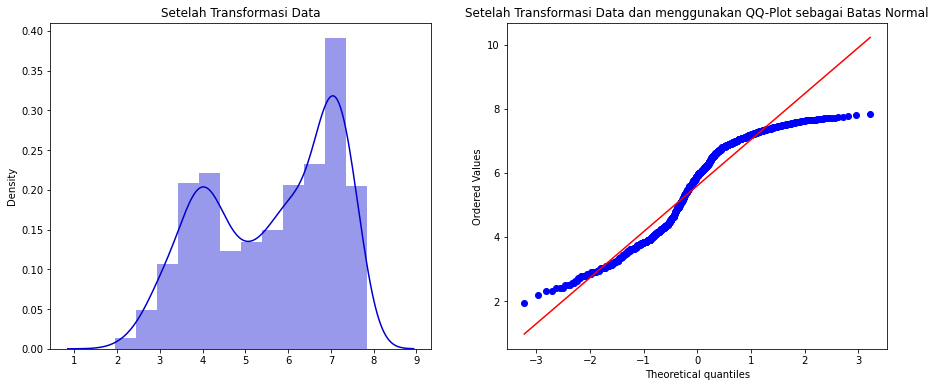

In [45]:
warnings.filterwarnings("ignore")
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.distplot(x = df_log['Monetory'], kde = True, color = "mediumblue")
plt.title('Setelah Transformasi Data')

plt.subplot(1,2,2)
probplot(df_log['Monetory'], dist = 'norm', plot=plt)
plt.title("Setelah Transformasi Data dan menggunakan QQ-Plot sebagai Batas Normal")

### -> *Scaling* Fitur di Dataset:

In [46]:
# Menormalkan distribusi data :
scaler = preprocessing.MinMaxScaler()
df_spain_norm = pd.DataFrame(scaler.fit_transform(df_log[['Recent_Purchase','Frequency','Monetory']]))
df_spain_norm.columns = ['Recent_Purchase','Frequency','Monetory']

df_spain_norm.head()

,Recent_Purchase,Frequency,Monetory
0,0.0,0.4375,0.872320
1,0.0,0.1875,0.437444
2,0.0,0.5000,0.872605
3,0.0,0.1875,0.446431
4,0.0,0.3125,0.587802


In [47]:
df_spain_norm.describe()

,Recent_Purchase,Frequency,Monetory
count,1095.000000,1095.000000,1095.000000
mean,0.502099,0.387643,0.620098
std,0.293977,0.226193,0.252187
min,0.000000,0.000000,0.000000
25%,0.247475,0.187500,0.387349
50%,0.515152,0.375000,0.672868
75%,0.747475,0.593750,0.850272
max,1.000000,1.000000,1.000000


## 4).<u>  Model: <u>

## <font color = black> -> <u>Berbagai Algoritma clustering: <u></font>

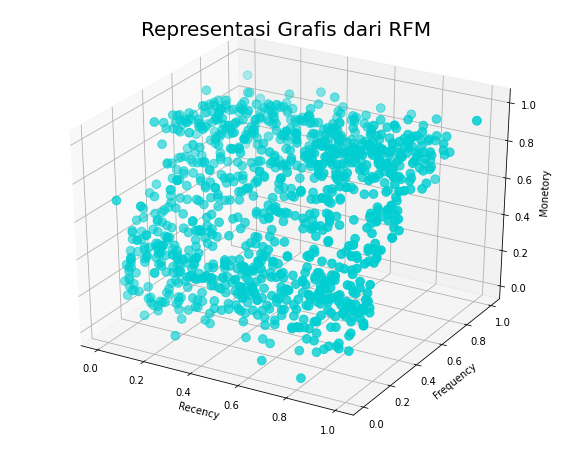

In [49]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(projection='3d')

im = ax.scatter(df_spain_norm["Recent_Purchase"],df_spain_norm["Frequency"],df_spain_norm["Monetory"],
               color = 'darkturquoise',s = 75)       
plt.title('Representasi Grafis dari RFM',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

***Terlihat pada gambar scatter 3D, dapat diamati bahwa titik-titik data tidak mengikuti pola apa pun melainkan telah mengelompok di area tertentu yang secara jelas menggambarkannya sebagai kluster cembung.***

## 1). Algoritma 'K - Means Clustering' :

***Algoritme K-means mengidentifikasi jumlah kluster (k), dan kemudian mengalokasikan setiap titik data ke cluster terdekat, sambil menjaga centroid sekecil mungkin.***

*Algoritma kluster K-Means bekerja dengan baik saat data tidak miring. Selain itu, ia menggunakan pengukuran berbasis jarak karena itu menjadi sangat penting untuk menskalakan data dan juga memperlakukan outlier karena tidak kuat.*

In [50]:
# Membuat fungsi Algoritma Kmeans dan kembalikan centroid, cluster, interia:
def Kmeans_algo(data,n):
    """ Function for Kmeans Clustering."""
    
    kmeans_model = KMeans(n_clusters = n, init = 'k-means++', max_iter = 300,
                         random_state = 42, algorithm = 'elkan')
    kmeans_model.fit(data)
    
    # centroids:
    centroids = kmeans_model.cluster_centers_
    
    # labeling:
    labels = kmeans_model.labels_
    df_spain_norm['label'] = labels
    
    # metriks evaluasi:
    interia = kmeans_model.inertia_
    sil_score = metrics.silhouette_score(data, labels)
    
    return interia, labels, centroids, sil_score

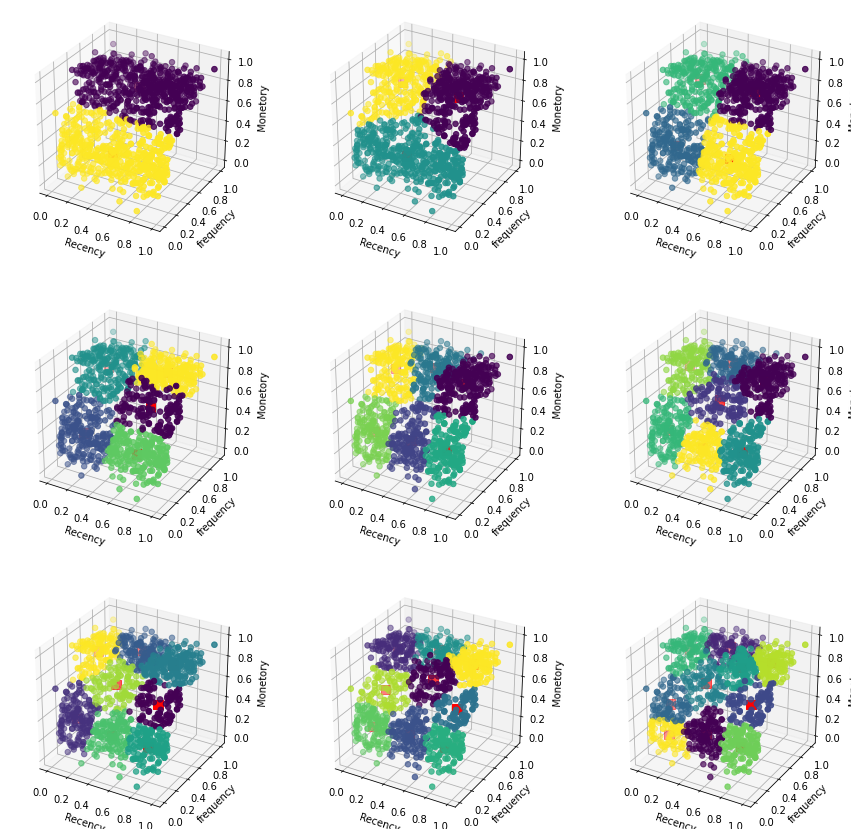

In [51]:
# membuat dataframe baru :
x3 = df_spain_norm[['Recent_Purchase','Frequency','Monetory']]

x3_interia_score = []
x3_s_score = []

fig = plt.figure(figsize = (15,15))


for i in range(2,11):
    x3_interia, x3_lables, x3_centroids, x3_sil_score = Kmeans_algo(x3, i)
    x3_interia_score.append(x3_interia)
    x3_s_score.append(x3_sil_score)
    centroids_df = pd.DataFrame(x3_centroids, columns = ['Recent_Purchase','Frequency','Monetory'])
    
    ax = fig.add_subplot(330 + i - 1, projection='3d')
    
    #scatter plot:
    ax.scatter(df_spain_norm['Recent_Purchase'],df_spain_norm['Frequency'],df_spain_norm['Monetory'],
                s = 30, c = df_spain_norm["label"], cmap = "viridis")
    ax.scatter(centroids_df['Recent_Purchase'], centroids_df['Frequency'], centroids_df['Monetory'], 
               s = 90, marker= ",", color = "r")
    ax.set_xlabel('Recency')
    ax.set_ylabel('frequency')
    ax.set_zlabel('Monetory')

### -> HyperParameter Tuning K-Means:

***Metode elbow menjalankan k-means clustering pada dataset untuk rentang nilai k (katakanlah dari 1-10) dan kemudian untuk setiap nilai k menghitung skor rata-rata untuk semua cluster.***

Text(0, 0.5, 'Inertia Values')

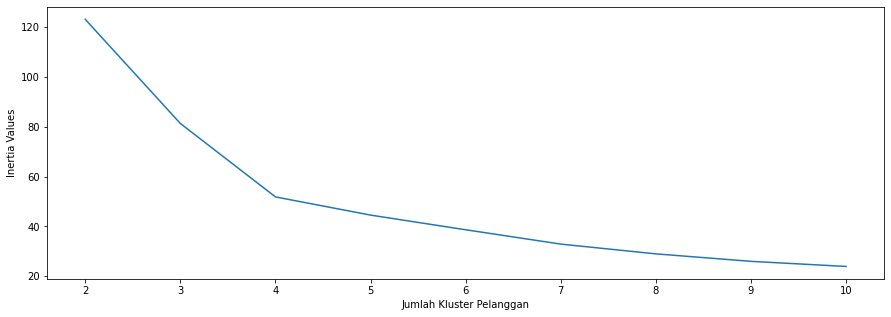

In [53]:
#elbow method:
plt.figure(11, figsize = (15,5))
plt.plot(np.arange(2,11), x3_interia_score, '-')
plt.xlabel("Jumlah Kluster Pelanggan")
plt.ylabel("Inertia Values")    

*Seperti yang terlihat pada plot, plot terlihat seperti lengan dengan siku yang jelas di k = 4.*

#### -> Validasi Jumlah Cluster yang Dipilih dengan Metode Silhouette:

Text(0, 0.5, 'Nilai Silhouette')

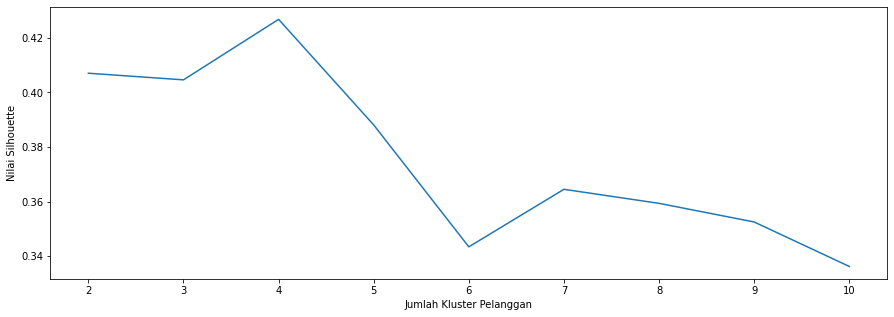

In [54]:
# plot inertia values pada jumlah kluster
plt.figure(11, figsize=(15,5))
plt.plot(np.arange(2,11) , x3_s_score)
plt.xlabel("Jumlah Kluster Pelanggan")
plt.ylabel("Nilai Silhouette")

*Dari grafik di atas, terdapat puncak yang jelas pada k = 4. Oleh karena itu optimal.*

### -> Applying the Updated Algorithm :

In [55]:
d1 = df_spain_norm[['Recent_Purchase','Frequency','Monetory']]
model1 = KMeans(n_clusters = 4, max_iter = 400, random_state = 42)
model1.fit(d1)
d1['labels'] = model1.labels_

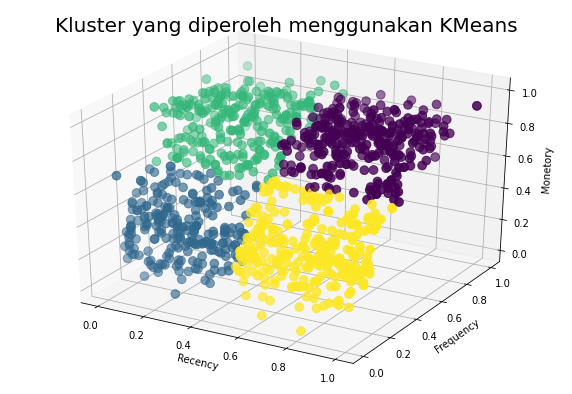

In [57]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(d1["Recent_Purchase"], d1["Frequency"], d1["Monetory"],
               c = model1.labels_ , cmap = "viridis" ,s = 75)       
plt.title('Kluster yang diperoleh menggunakan KMeans',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

In [58]:
score1 = metrics.silhouette_score(d1[['Recent_Purchase','Frequency','Monetory']], model1.labels_, metric='euclidean')
c1 = metrics.calinski_harabasz_score(d1[['Recent_Purchase','Frequency','Monetory']], model1.labels_)

## 2). Algoritma DBSCAN:

#### *DBSCAN adalah algoritma clustering yang tahan terhadap outlier atau noise. Sebelum implementasi algoritjm ini sangat penting kita mencari nilai optimal untuk dua parameter penting EPSILON dan MNT POINTS.*
- ***Epsilon :  Kami akan menggunakan KNearestNeighbours untuk menghitung jarak rata-rata untuk setiap titik data. Oleh karena itu kita harus terlebih dahulu mencari nilai optimal untuk tetangga terdekat yang akan dipertimbangkan.***
- ***Minimum Points :  Jumlah Dimensi *2 ***

In [59]:
df_spain_dbscan = df_spain_norm[['Recent_Purchase','Frequency','Monetory']]
df_spain_dbscan.head()

,Recent_Purchase,Frequency,Monetory
0,0.0,0.4375,0.872320
1,0.0,0.1875,0.437444
2,0.0,0.5000,0.872605
3,0.0,0.1875,0.446431
4,0.0,0.3125,0.587802


### ->Hyper Parameter Tuning:
### i)Menentukan Jumlah Poin Minimum yang optimal:

In [61]:
Mnt_pnts = len(df_spain_dbscan.columns)*2
print('Poin Minimum yang Dipertimbangkan setelah Hyper Parameter Tuning adalah :', Mnt_pnts)

Poin Minimum yang Dipertimbangkan setelah Hyper Parameter Tuning adalah : 6


### ii). Menentukan nilai optimal untuk Epsilon:

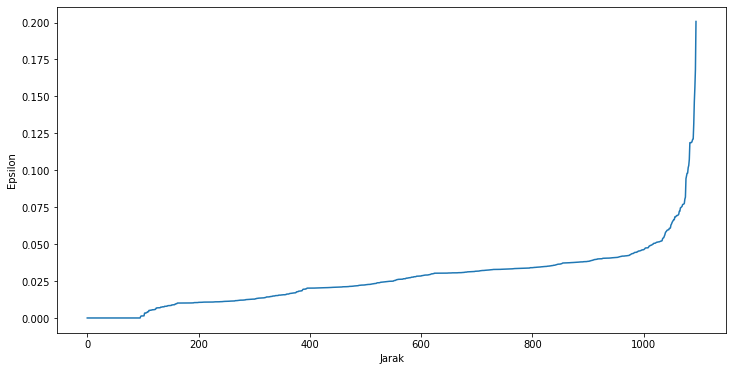

In [63]:
# Pertama, mencari jarak rata-rata menggunakan KNN:
neighbours = NearestNeighbors(n_neighbors = Mnt_pnts)
knn_data = neighbours.fit(df_spain_dbscan)

# Mendapatkan indeks dan jarak:
distances, indices = knn_data.kneighbors(df_spain_dbscan)

# Mengurutkan jarak:
sorting_distance = np.sort(distances, axis = 0)

# Jarak terurut
sorted_distance = sorting_distance[:,1]

# plotting antara epsilon dan jarak
plt.figure(figsize = (12,6))
plt.plot(sorted_distance)
plt.xlabel('Jarak')
plt.ylabel('Epsilon')
plt.show()

*Nilai ideal untuk akan sama dengan nilai jarak pada “crook of the elbow”, atau titik kelengkungan maksimum. Memperbesar plot k-distance, terlihat bahwa nilai optimal untuk adalah sekitar 0,100 hingga 0,120. Kami akhirnya mengulang kombinasi nilai MinPts dan sedikit di atas dan di bawah nilai yang diperkirakan di sini untuk menemukan model yang paling cocok.*
- ***Nilai ideal yang dipilih untuk Epsilon adalah 0,120***

### -> Aplikasi Algoritma Terbaru:

In [64]:
# Membuat kerangka data dan menggunakan algoritma DBSCAN:
x1 = df_spain_dbscan[['Recent_Purchase','Frequency','Monetory']]
dbscan_model = DBSCAN(eps = 0.120, min_samples = Mnt_pnts).fit(df_spain_dbscan)
df_spain_dbscan['labels'] = dbscan_model.labels_
print('The Number of Clusters Obtained will be :')
print(df_spain_dbscan['labels'].value_counts())

# menghitung nilai Silhoutte:
print("")
score = metrics.silhouette_score(x1, dbscan_model.labels_)
print("Nilai Silhoutte adalah:", score)

The Number of Clusters Obtained will be :
 0    1084
-1      11
Name: labels, dtype: int64

Nilai Silhoutte adalah: 0.232360314252089


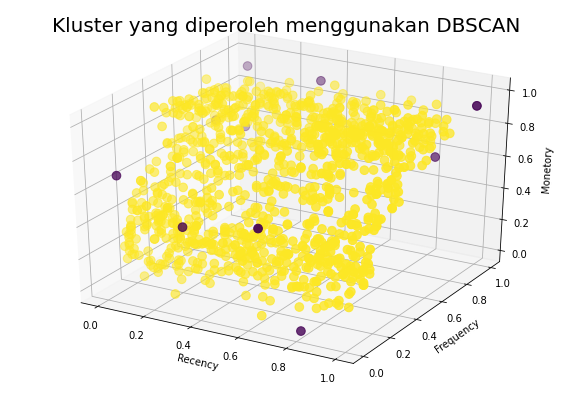

In [65]:
#plotting :
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(df_spain_dbscan["Recent_Purchase"],df_spain_dbscan["Frequency"],df_spain_dbscan["Monetory"],
               c = df_spain_dbscan["labels"] , cmap ="viridis",s = 75)       
plt.title('Kluster yang diperoleh menggunakan DBSCAN',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

In [66]:
d2 = df_spain_dbscan[['Recent_Purchase','Frequency','Monetory']]
model2 = DBSCAN(eps = 0.120, min_samples = Mnt_pnts)
model2.fit(d2)

DBSCAN(eps=0.12, min_samples=6)

In [67]:
score2 = metrics.silhouette_score(d2, model2.labels_, metric='euclidean')
c2 = metrics.calinski_harabasz_score(d2, model2.labels_)

## 3). Pengelompokan hierarki aglomeratif:

***Ini adalah jenis algoritma Clustering dimana cluster-cluster digabungkan secara berurutan berdasarkan ukuran kemiripan hingga semua cluster telah digabungkan menjadi satu cluster besar yang berisi semua objek.***

In [68]:
df_spain_agglo = df_spain_norm[['Recent_Purchase','Frequency','Monetory']]
df_spain_agglo.head()

,Recent_Purchase,Frequency,Monetory
0,0.0,0.4375,0.872320
1,0.0,0.1875,0.437444
2,0.0,0.5000,0.872605
3,0.0,0.1875,0.446431
4,0.0,0.3125,0.587802


### i). Menentukan jumlah kluster:

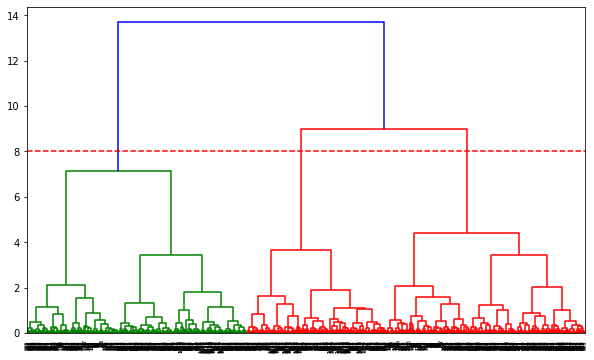

In [69]:
plt.figure(figsize = (10,6))
shc.dendrogram(shc.linkage(df_spain_agglo, method='ward'))
plt.axhline(y = 8, color='r', linestyle='--')
plt.show()

#### -> Validasi Jumlah Cluster yang Dipilih dengan Metode Silhouette:

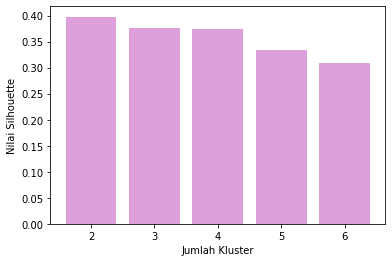

In [71]:
#validation
agglo_s_score = []
x1 = df_spain_agglo[['Recent_Purchase','Frequency','Monetory']]

for n_cluster in range(2,7):
    agglo_s_score.append(metrics.silhouette_score(x1, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(x1))) 
    
    
k = [2, 3, 4, 5, 6] 
plt.bar(k,agglo_s_score, color = 'plum' ) 
plt.xlabel('Jumlah Kluster', fontsize = 10) 
plt.ylabel('Nilai Silhouette', fontsize = 10) 
plt.show()

*Jumlah Cluster yang akan Dipilih adalah 3.*

### -> Menerapkan Algoritma Terbaru:

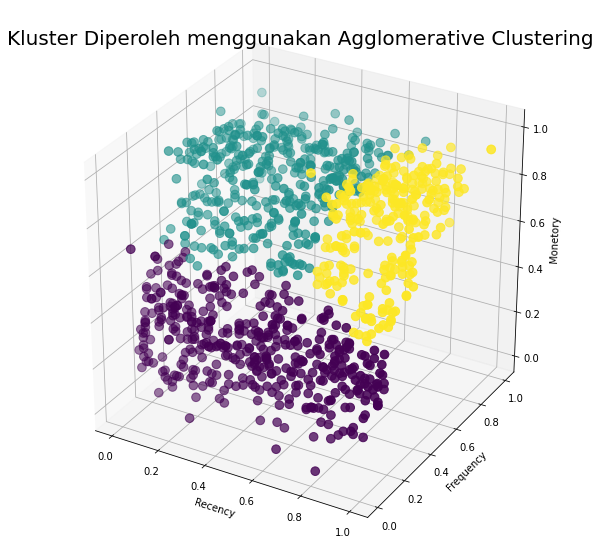

In [72]:
x1 = df_spain_agglo[['Recent_Purchase','Frequency','Monetory']]


agglo_hier_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') 
agglo_hier_model.fit(df_spain_agglo)
df_spain_agglo['labels'] = agglo_hier_model.labels_

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_spain_agglo["Recent_Purchase"],df_spain_agglo["Frequency"],df_spain_agglo["Monetory"],
               c = df_spain_agglo['labels'], cmap ="viridis",s = 75) 

plt.title('Kluster Diperoleh menggunakan Agglomerative Clustering',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

In [73]:
d3 = df_spain_agglo[['Recent_Purchase','Frequency','Monetory']]
model3 = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward') 
model3.fit(d3)

AgglomerativeClustering(n_clusters=3)

In [74]:
score3 = metrics.silhouette_score(d3, model3.labels_, metric='euclidean')
c3 = metrics.calinski_harabasz_score(d3, model3.labels_)

## -> <u> Validasi Algoritma Clustering:<u>

In [75]:
# Dataframe nilai Silhoutte:
validation_df = pd.DataFrame({'Algorithms': ['KMeans','DBSCAN',"Agglomerative Clustering"],
                              "Silhouette Score": [score1, score2, score3]})

# Dataframe Calinski:
validation_df_cal = pd.DataFrame({'Algorithms': ['KMeans','DBSCAN',"Agglomerative Clustering"],
                              "Calinski Score": [c1,c2,c3]})

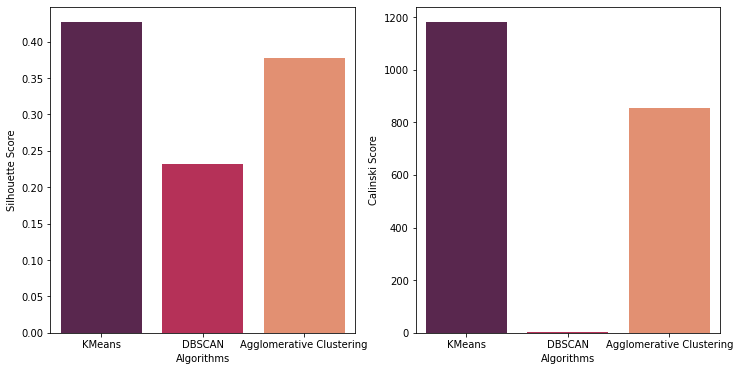

In [76]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.barplot(x = validation_df['Algorithms'], y = validation_df['Silhouette Score'], 
              palette = 'rocket')

plt.subplot(1,2,2)
sns.barplot(x = validation_df_cal['Algorithms'], y = validation_df_cal['Calinski Score'], 
              palette = 'rocket')

***Dengan pertimbangan dua skor di atas, kami dapat menyimpulkan bahwa model KMeans lebih cocok untuk dataset kami.***

## 5). <u> Interpretasi dan Kesimpulan:<u>

***Algoritma KMeans memiliki 4 cluster berbeda yang terbentuk. Ini dinilai penting untuk mengidentifikasi cluster dan mengelompokkan Customer (pelanggan) yang sesuai.***

In [77]:
df1 = pd.DataFrame(df_spain[['ID','Recent_Purchase','Frequency','Monetory']])
df2 = pd.DataFrame(d1['labels'])

final_df = pd.concat([df1,df2], axis = 1)
final_df.head()

,ID,Recent_Purchase,Frequency,Monetory,labels
0,1826,0,14,1190,2
1,5371,0,6,91,1
2,7348,0,16,1192,2
3,1991,0,6,96,1
4,5642,0,10,222,1


### -> Pengelompokan berdasarkan Kluster:

In [78]:
final_df_cluster0 = final_df[(final_df['labels'] == 0)].reset_index()   # Loyal 
final_df_cluster0.describe() 

,index,ID,Recent_Purchase,Frequency,Monetory,labels
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.0
mean,806.819620,5301.933544,73.683544,18.427215,1070.784810,0.0
std,161.404242,3394.151189,14.136562,4.425513,494.014489,0.0
min,512.000000,17.000000,48.000000,10.000000,304.000000,0.0
25%,671.500000,2387.500000,62.000000,15.000000,684.250000,0.0
50%,800.500000,5119.000000,73.000000,18.500000,1004.500000,0.0
75%,945.500000,8462.750000,86.000000,22.000000,1406.750000,0.0
max,1094.000000,11166.000000,99.000000,32.000000,2440.000000,0.0


In [79]:
final_df_cluster1 = final_df[(final_df['labels'] == 1)].reset_index()   
final_df_cluster1.describe()

,index,ID,Recent_Purchase,Frequency,Monetory,labels
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.0
mean,249.911392,5779.405063,22.236287,5.426160,82.185654,1.0
std,144.480031,3257.692971,13.673674,1.967918,67.019407,0.0
min,1.000000,35.000000,0.000000,0.000000,9.000000,1.0
25%,127.000000,3050.000000,11.000000,4.000000,37.000000,1.0
50%,246.000000,5835.000000,22.000000,5.000000,62.000000,1.0
75%,370.000000,8594.000000,33.000000,7.000000,103.000000,1.0
max,505.000000,11191.000000,48.000000,11.000000,373.000000,1.0


In [80]:
final_df_cluster2 = final_df[(final_df['labels'] == 2)].reset_index()   #potential
final_df_cluster2.describe()

,index,ID,Recent_Purchase,Frequency,Monetory,labels
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.0
mean,256.719557,5694.678967,22.819188,18.029520,1027.453875,2.0
std,149.117015,3211.151421,14.147391,4.530458,542.629343,0.0
min,0.000000,158.000000,0.000000,9.000000,266.000000,2.0
25%,127.000000,2906.000000,11.000000,14.500000,506.000000,2.0
50%,260.000000,5512.000000,23.000000,18.000000,999.000000,2.0
75%,387.500000,8489.000000,35.000000,21.000000,1400.500000,2.0
max,515.000000,11112.000000,48.000000,32.000000,2525.000000,2.0


In [81]:
final_df_cluster3 = final_df[(final_df['labels'] == 3)].reset_index()
final_df_cluster3.describe()

,index,ID,Recent_Purchase,Frequency,Monetory,labels
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.0
mean,794.132841,5527.981550,72.664207,5.859779,95.697417,3.0
std,178.867810,3145.898903,15.667192,2.360690,79.043898,0.0
min,504.000000,48.000000,48.000000,0.000000,6.000000,3.0
25%,632.500000,2995.000000,58.000000,4.000000,37.500000,3.0
50%,802.000000,5253.000000,73.000000,5.000000,64.000000,3.0
75%,948.500000,8152.500000,86.000000,7.000000,137.500000,3.0
max,1093.000000,11188.000000,99.000000,11.000000,311.000000,3.0


### -> Conclusion based on the Clusters Formed:

- ***CLUSTER 2: Pelanggan Loyal, yang merupakan juara dari semua pelanggan dengan skor RFM tertinggi.***
- ***CLUSTER 0: Pelanggan yang paling berpotensi menjadi Champion. Mereka baru-baru ini membeli produk dan mereka cukup sering melakukan pembelian. Apalagi jumlah yang mereka keluarkan cukup besar.***
- ***CLUSTER 1: Pelanggan yang biasanya membeli produk selama beberapa penawaran/diskon. Skor RFM mereka cukup rendah sehingga kemungkinan besar mereka akan keluar.***
- ***CLUSTER 3: Pelanggan yang melakukan churn***

***Based on Customer Segmentation that has been done in SPAIN, high-value Customers are those who either belong to CLUSTER 2 or 0. Moreover, the company can also try implementing some effective Marketing Strategies to retain the customers who are more likely to be churned out.***

Berdasarkan Segmentasi Pelanggan yang telah dilakukan di negara Spanyol, Pelanggan bernilai tinggi adalah mereka yang termasuk dalam CLUSTER 2 atau 0. Selain itu, perusahaan juga dapat mencoba menerapkan beberapa Strategi Pemasaran yang efektif untuk mempertahankan pelanggan yang lebih cenderung mengulang pembelian kembali atau berlangganan.